# Boston Housing Prices

Linear Regression and Stats Models

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot as plt
%matplotlib inline

import statsmodels.formula.api as smf 

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import sklearn

bs = sklearn.datasets.load_boston()
print(bs.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [2]:
print(bs.data.shape)
print(type(bs.data))
print(bs.keys())
print(bs.feature_names)

(506, 13)
<class 'numpy.ndarray'>
dict_keys(['data', 'DESCR', 'feature_names', 'target'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [3]:
print(bs.target)
#These are the housing prices

[ 24.   21.6  34.7  33.4  36.2  28.7  22.9  27.1  16.5  18.9  15.   18.9
  21.7  20.4  18.2  19.9  23.1  17.5  20.2  18.2  13.6  19.6  15.2  14.5
  15.6  13.9  16.6  14.8  18.4  21.   12.7  14.5  13.2  13.1  13.5  18.9
  20.   21.   24.7  30.8  34.9  26.6  25.3  24.7  21.2  19.3  20.   16.6
  14.4  19.4  19.7  20.5  25.   23.4  18.9  35.4  24.7  31.6  23.3  19.6
  18.7  16.   22.2  25.   33.   23.5  19.4  22.   17.4  20.9  24.2  21.7
  22.8  23.4  24.1  21.4  20.   20.8  21.2  20.3  28.   23.9  24.8  22.9
  23.9  26.6  22.5  22.2  23.6  28.7  22.6  22.   22.9  25.   20.6  28.4
  21.4  38.7  43.8  33.2  27.5  26.5  18.6  19.3  20.1  19.5  19.5  20.4
  19.8  19.4  21.7  22.8  18.8  18.7  18.5  18.3  21.2  19.2  20.4  19.3
  22.   20.3  20.5  17.3  18.8  21.4  15.7  16.2  18.   14.3  19.2  19.6
  23.   18.4  15.6  18.1  17.4  17.1  13.3  17.8  14.   14.4  13.4  15.6
  11.8  13.8  15.6  14.6  17.8  15.4  21.5  19.6  15.3  19.4  17.   15.6
  13.1  41.3  24.3  23.3  27.   50.   50.   50.   2

In [4]:
bos = pd.DataFrame(bs.data, columns=bs.feature_names)
bos[0:10]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [5]:
bos['PRICE'] = bs.target

In [6]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
X = bs.data
y = bs.target

X.shape, y.shape

((506, 13), (506,))

In [8]:
lr = LinearRegression()
lr.fit(X, y)
print('Intercept = ', lr.intercept_)

print(pd.Series(lr.coef_, index=bs.feature_names))

print('R^2 = ', lr.score(X, y))

Intercept =  36.4911032804
CRIM       -0.107171
ZN          0.046395
INDUS       0.020860
CHAS        2.688561
NOX       -17.795759
RM          3.804752
AGE         0.000751
DIS        -1.475759
RAD         0.305655
TAX        -0.012329
PTRATIO    -0.953464
B           0.009393
LSTAT      -0.525467
dtype: float64
R^2 =  0.740607742865


In [9]:
print(X[0], y[0])
print('Predicted price of first X:  ', lr.predict(X[0]))
print('Actual price of first X: ', y[0])

print('Manual Model: ', np.sum(X[0] * lr.coef_) + lr.intercept_)
#The manual model shows the formula of how we are deriving our predicted price

print('Intercept value: ', lr.intercept_)

[  6.32000000e-03   1.80000000e+01   2.31000000e+00   0.00000000e+00
   5.38000000e-01   6.57500000e+00   6.52000000e+01   4.09000000e+00
   1.00000000e+00   2.96000000e+02   1.53000000e+01   3.96900000e+02
   4.98000000e+00] 24.0
Predicted price of first X:   [ 30.00821269]
Actual price of first X:  24.0
Manual Model:  30.0082126923
Intercept value:  36.4911032804


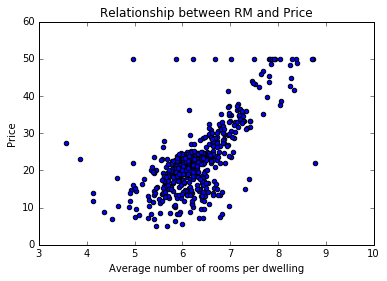

In [10]:
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Price")
plt.title("Relationship between RM and Price")
plt.show()

Positive Correlation between the number of rooms and the price of the house.

In [11]:
bos[['RM', 'PRICE']].corr()

,RM,PRICE
RM,1.00000,0.69536
PRICE,0.69536,1.00000


In [12]:
lr.predict(X)[0:5]

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,  27.94288232])

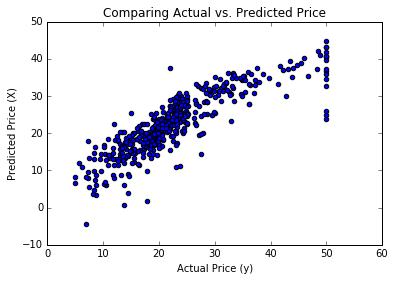

In [13]:
plt.scatter(bos.PRICE, lr.predict(X))
plt.xlabel("Actual Price (y)")
plt.ylabel("Predicted Price (X)")
plt.title("Comparing Actual vs. Predicted Price")

Note: As the actual housing prices increase, we come to see some errors.

In [14]:
mse = np.mean((bos.PRICE - lr.predict(X)) ** 2)
mse

21.89777921768749

Error is lower than if we were to use just one or two features.

In [15]:
#Train Test Split

X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(X, y, test_size=0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

In [17]:
mse_train = np.mean((y_train - pred_train) ** 2)
mse_train

19.546758473534666

In [18]:
mse_test = np.mean((y_test - pred_test) ** 2)
mse_test

28.541367275618477

(0, 100)

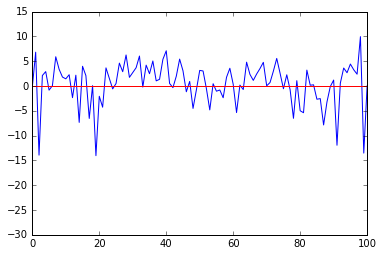

In [19]:
plt.plot(np.arange(len(y_train)), pred_train - y_train)
plt.plot(np.arange(len(y_train)), np.zeros(len(y_train)), color='r')
plt.xlim(0, 100)

(0, 100)

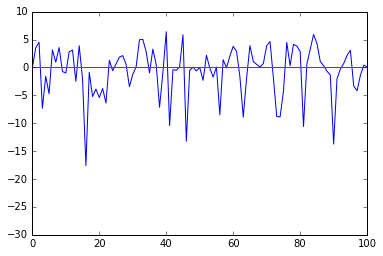

In [20]:
plt.plot(np.arange(len(y_test)), pred_test - y_test)
plt.plot(np.arange(len(y_test)), np.zeros(len(y_test)), color='r')
plt.xlim(0, 100)

(0, 100)

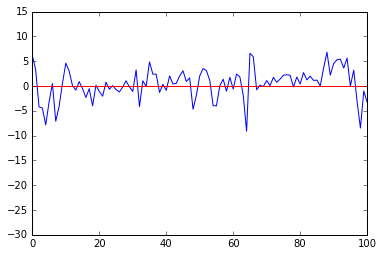

In [21]:
y_pred = lr.predict(X)
plt.plot(np.arange(len(y)), y_pred - y)
plt.plot(np.arange(len(y)), np.zeros(len(y)), color='r')
plt.xlim(0, 100)

Visualizing our error

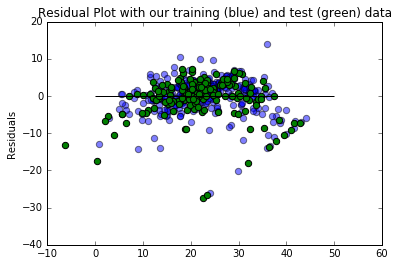

In [22]:
plt.scatter(pred_train, pred_train - y_train, c='b', s=40, alpha=0.5)
plt.scatter(pred_test, pred_test - y_test, c='g', s=40)
plt.hlines(y=0, xmin=0, xmax=50)
plt.title("Residual Plot with our training (blue) and test (green) data")
plt.ylabel("Residuals")

Plot of the residuals for the train and test datasets.

In [23]:
lm = smf.ols(data = bos, formula='PRICE ~ CRIM + ZN + INDUS + \
             CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT')

lm = lm.fit()
lm.params

Intercept    36.491103
CRIM         -0.107171
ZN            0.046395
INDUS         0.020860
CHAS          2.688561
NOX         -17.795759
RM            3.804752
AGE           0.000751
DIS          -1.475759
RAD           0.305655
TAX          -0.012329
PTRATIO      -0.953464
B             0.009393
LSTAT        -0.525467
dtype: float64

In [24]:
# ols = Ordinary Least Squares
lm = smf.ols(data=bos, formula='np.log(PRICE) ~ np.log(CRIM) + ZN + \
    CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT').fit_regularized(alpha=0.001)

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(PRICE)   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     138.5
Date:                Thu, 09 Jun 2016   Prob (F-statistic):          3.81e-143
Time:                        11:18:14   Log-Likelihood:                 91.203
No. Observations:                 506   AIC:                            -158.4
Df Residuals:                     494   BIC:                            -107.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        3.1611      0.222     14.230      0.000         2.725     3.598
np.log(CRIM)    -0.0184      0.012     -1.596      0.111        -0.041     0.004
ZN               0.0006      0.001      1.079      0.281        -0.001     0.002
CHAS             0.1000      0.037      2.715      0.007         0.028     0.172
NOX             -0.0516      0.160     -0.322      0.748        -0.367     0.264
RM               0.1247      0.018      7.109      0.000         0.090     0.159
DIS             -0.0302      0.008     -3.779      0.000        -0.046    -0.015
RAD              0.0083      0.003      2.720      0.007         0.002     0.014
TAX             -0.0006      0.000     -3.818      0.000        -0.001    -0.000
PTRATIO         -0.0260      0.006     -4.645      0.000        -0.037    -0.015
B                0.0006      0.000      5.053      0.000         0.000     0.001
LSTAT           -0.0298      0.002    -14.501      0.000        -0.034    -0.026
==============================================================================
Omnibus:                       66.456   Durbin-Watson:                   0.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              470.030
Skew:                           0.272   Prob(JB):                    8.60e-103
Kurtosis:                       7.690   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
lm.params

Intercept       3.161134
np.log(CRIM)   -0.018422
ZN              0.000647
CHAS            0.100001
NOX            -0.051619
RM              0.124682
DIS            -0.030216
RAD             0.008322
TAX            -0.000556
PTRATIO        -0.025977
B               0.000583
LSTAT          -0.029849
dtype: float64

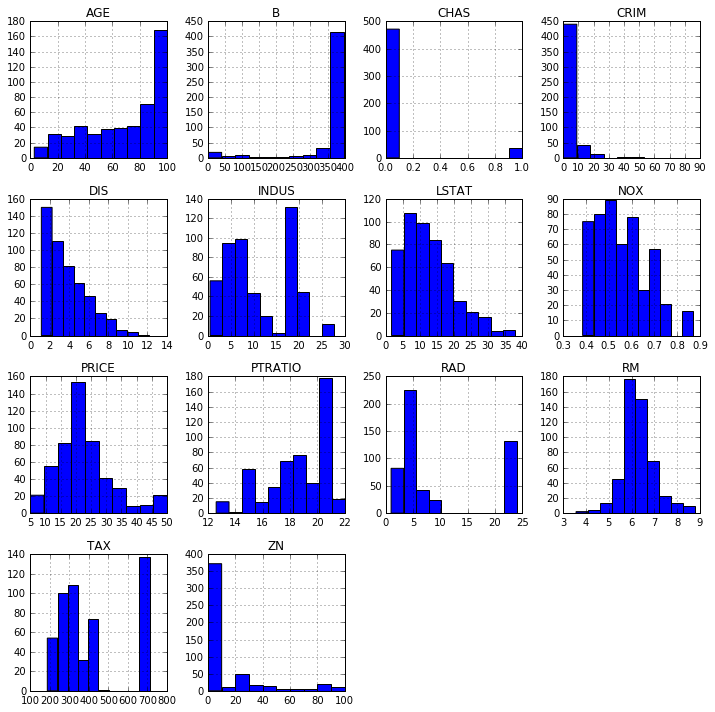

In [26]:
bos.hist(figsize=(12,12));

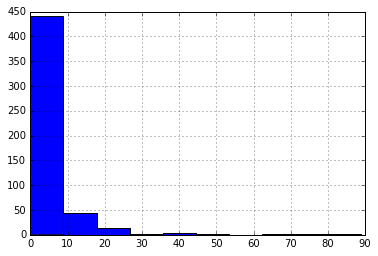

In [27]:
bos['CRIM'].hist()

(array([   3.,    8.,   13.,   23.,   63.,  100.,  172.,   52.,   40.,   32.]),
 array([ 1.60943791,  1.83969642,  2.06995493,  2.30021344,  2.53047195,
         2.76073046,  2.99098897,  3.22124748,  3.45150599,  3.6817645 ,
         3.91202301]),
 <a list of 10 Patch objects>)

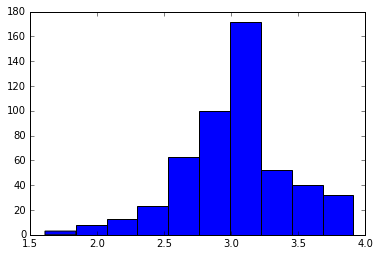

In [28]:
plt.hist(np.log(bos['PRICE']))

(array([  12.,   45.,  109.,   94.,   59.,   38.,   44.,   65.,   32.,    8.]),
 array([-5.06403607, -4.10879557, -3.15355507, -2.19831457, -1.24307408,
        -0.28783358,  0.66740692,  1.62264742,  2.57788792,  3.53312842,
         4.48836892]),
 <a list of 10 Patch objects>)

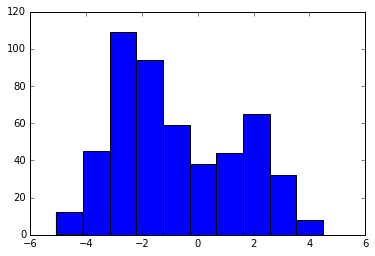

In [29]:
plt.hist(np.log(bos['CRIM']))

In [30]:
bos.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
